# Signal processing for visualization
* After reaading h5 files: Velocity (m/s) data 

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

## 1) Read velocity files for real and selected stations 

In [2]:
filename1 = '/Users/elifo/Desktop/2HZ_LosAlamos_ichunk_0.h5'
filename2 = '/Users/elifo/Desktop/3HZ_LosAlamos_ichunk_0.h5'

sep = '_'
NT = 6000
dt_output = 5e-3

In [4]:
# read station coordinates 
sta_coords = pd.read_hdf(filename1, key='Stations')

In [6]:
%%time 

def get_signals_from_chunk_file(filename=''):
    # read signal per component
    ichunk = 0 # remove this!
    data_xyz = []
    for compo in ['X', 'Y', 'Z']:
        print ('Component: ', compo)
        df = pd.read_hdf(filename, key='V'+sep+compo)
        data = df.values
        NSTA_chunk = int(data.shape[0]/NT)
        data_xyz.append(data.reshape(NSTA_chunk, NT))
        print()
    ##
    print('Station number in this chunk: ', NSTA_chunk)
    print('*')
    return data_xyz
###

data_xyz_2HZ =  get_signals_from_chunk_file(filename=filename1)

data_xyz_3HZ =  get_signals_from_chunk_file(filename=filename2)


Component:  X

Component:  Y

Component:  Z

Station number in this chunk:  10000
*
Component:  X

Component:  Y

Component:  Z

Station number in this chunk:  10000
*
CPU times: user 1.61 s, sys: 7.21 s, total: 8.82 s
Wall time: 11.1 s


In [11]:
sta_coords[15:25]

,Station,net,x,y,z
15,S1,EL,498018.4,539061.600000,2086.000000
16,S2,EL,497933.4,539092.500000,2087.000000
17,S3,EL,497893.2,539111.400000,2102.301618
18,S4,EL,497870.5,539116.500000,2109.798361
19,S5,EL,497838.3,539129.640312,2122.994206
20,S6,EL,497745.2,539162.500000,2128.846352
21,S7,EL,497802.8,539033.100000,2089.000000
22,S8,EL,497821.7,539084.100000,2113.000000
23,S9,EL,497853.3,539173.200000,2111.116353
24,S10,EL,497884.3,539240.000000,2090.000000


<IPython.core.display.Javascript object>


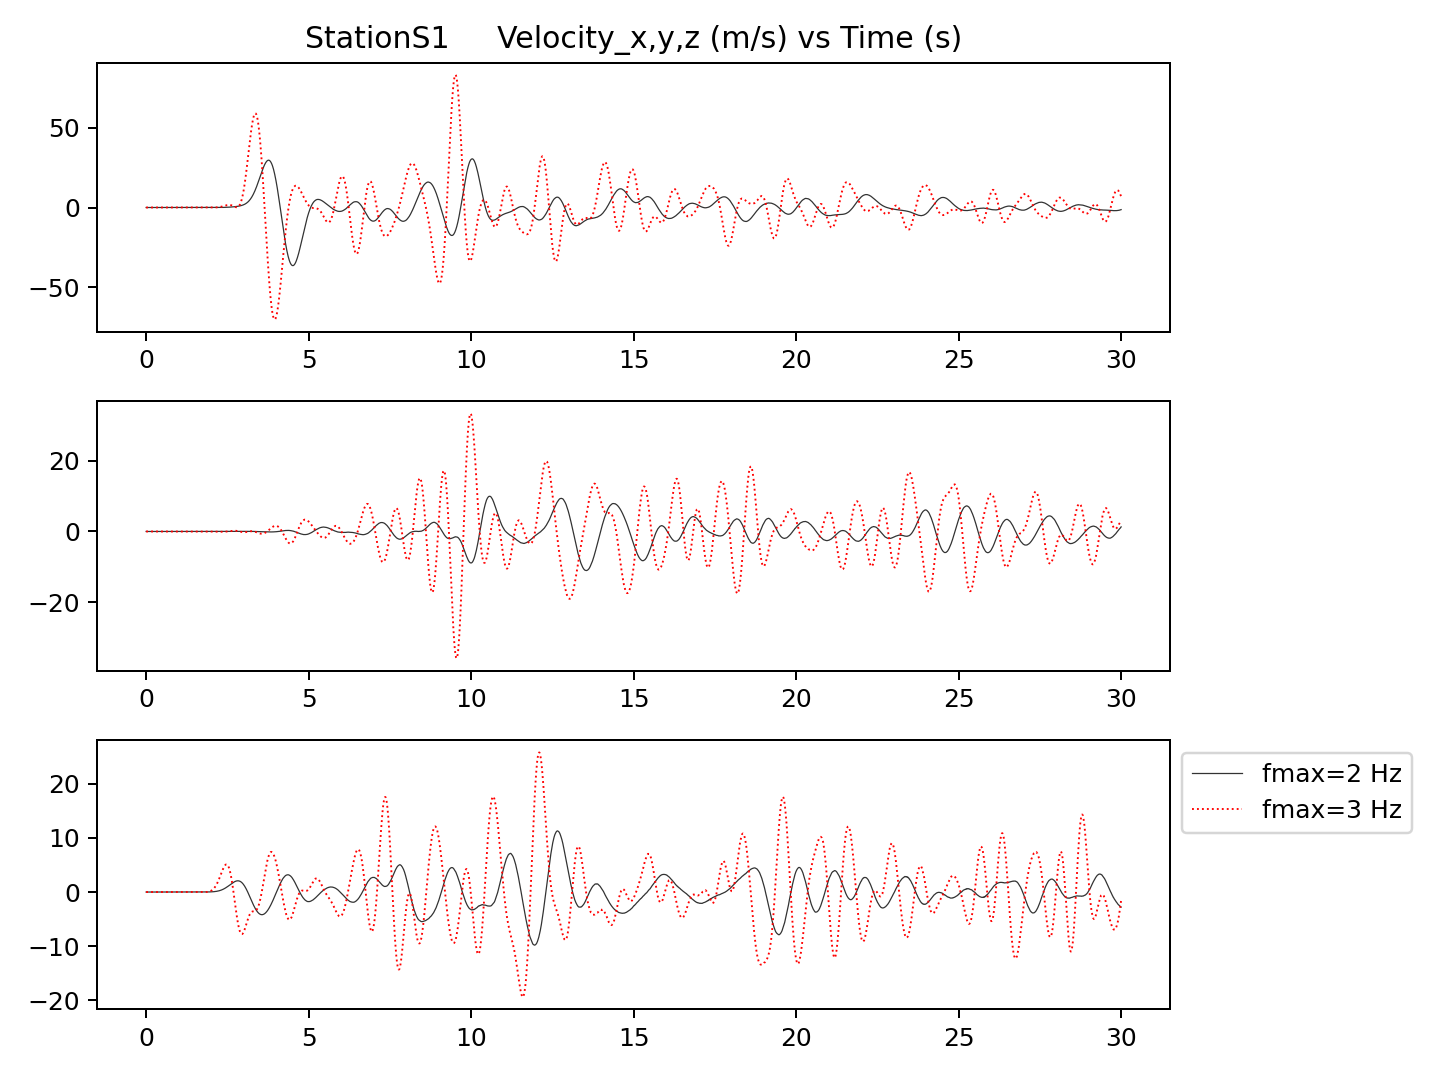

In [34]:
# quick check SMALL NETWORK 

ista = 15

time = np.arange(NT)*dt_output
fig = plt.figure(figsize=(8, 6))
plt.subplot(311)
# plt.title('Vx')
plt.title('Station'+ str(sta_coords['Station'][ista])+ '     Velocity_x,y,z (m/s) vs Time (s)'  )

plt.plot(time, data_xyz_2HZ[0][ista,:], alpha=0.8,lw=0.5, c='k')
plt.plot(time, data_xyz_3HZ[0][ista,:], alpha=1,lw=0.75, c='r',ls=':')
#
plt.subplot(312)
# plt.title('Vy')
plt.plot(time, data_xyz_2HZ[1][ista,:], alpha=0.8,lw=0.5, c='k')
plt.plot(time, data_xyz_3HZ[1][ista,:], alpha=1,lw=0.75, c='r',ls=':')
#

plt.subplot(313)
# plt.title('Vz')
plt.plot(time, data_xyz_2HZ[2][ista,:], alpha=0.8,lw=0.5, c='k', label='fmax=2 Hz')
plt.plot(time, data_xyz_3HZ[2][ista,:], alpha=1,lw=0.75, c='r',ls=':', label='fmax=3 Hz')

#

plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

In [ ]:
# in FFT


In [ ]:
#fin